# Link prediction results
In this notebook, we'll look at the results of our STHN model.

In [9]:
from collections import defaultdict
import matplotlib.pyplot as plt

## Read in & plot the per-epoch performance values
Unfortunately, the code doesn't have an option to save the epoch performance values as anything, the only option is to direct the `stdout` to a file, so we'll need to define our own little parser.

In [2]:
with open('../job_scripts/sthn_dt_24h.o') as f:
    performance_vals = [line.strip() for line in f.readlines()]

In [22]:
performance_vals[-1] # Overall score is last

'auroc 0.7685, auprc score 0.4164'

In [6]:
def get_epoch_perf(performance_vals):
    ep_idxs = {}
    for i, line in enumerate(performance_vals):
        if line[:9] == '>>> Epoch':
            ep_num = int(line[10:])
            ep_idxs[ep_num] = i
    ep_perfs = defaultdict(dict)
    for ep_num, idx in ep_idxs.items():
        for i, mode in enumerate(['train', 'valid', 'test']):
            type_perfs = {}
            perfs = performance_vals[idx + i + 1].split(', ')
            for perf in perfs:
                if len(perf.split()) == 2:
                    type_perfs[perf.split()[0]] = float(perf.split()[1])
            ep_perfs[ep_num][mode] = type_perfs
    return ep_perfs

In [8]:
epoch_performances = get_epoch_perf(performance_vals)

In [17]:
train_aurocs = {k: v['train']['AUROC'] for k, v in epoch_performances.items()}
train_losses = {k: v['train']['loss'] for k, v in epoch_performances.items()}
valid_aurocs = {k: v['valid']['AUROC'] for k, v in epoch_performances.items()}
valid_losses = {k: v['valid']['loss'] for k, v in epoch_performances.items()}
test_aurocs = {k: v['test']['AUROC'] for k, v in epoch_performances.items()}
test_losses = {k: v['test']['loss'] for k, v in epoch_performances.items()}

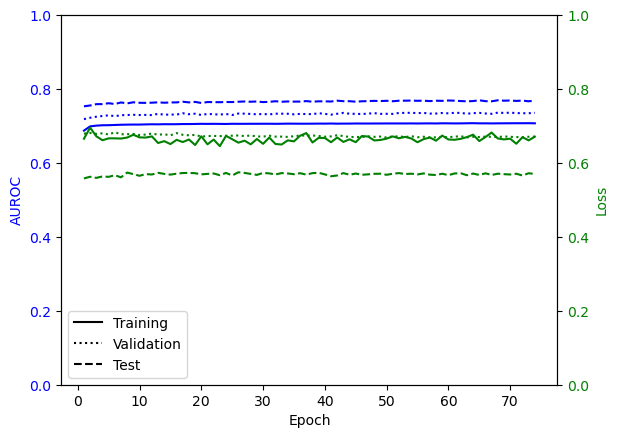

In [36]:
fig, ax1 = plt.subplots()

ax1.plot(train_aurocs.keys(), train_aurocs.values(), color='blue', label='Training')
ax1.plot(valid_aurocs.keys(), valid_aurocs.values(), color='blue', linestyle='dotted', label='Validation')
ax1.plot(test_aurocs.keys(), test_aurocs.values(), color='blue', linestyle='dashed', label='Test')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_ylim(0, 1)

ax2 = ax1.twinx()
ax2.plot(train_losses.keys(), train_losses.values(), color='green', label='Training')
ax2.plot(valid_losses.keys(), valid_losses.values(), color='green', linestyle='dotted', label='Validation')
ax2.plot(test_losses.keys(), test_losses.values(), color='green', linestyle='dashed', label='Test')
ax2.tick_params(axis='y', labelcolor='green')
ax2.set_ylim(0, 1)

ax1.set_ylabel('AUROC', color='blue')
ax2.set_ylabel('Loss', color='Green')
ax1.set_xlabel('Epoch')
ax1.legend(loc='lower left')
leg = ax1.get_legend()
for i in range(3):
    leg.legend_handles[i].set_color('black')